## CSC 580
## Assignment-4
## Hithesh Shanmugam

In [1]:
!pip install import-ipynb
import import_ipynb

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [2]:
import SnakeEnv as snake_env
import Agent as agent_class

import numpy as np
import matplotlib.pyplot as plt
import random

importing Jupyter notebook from SnakeEnv.ipynb
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
#states = 640
states = {2048, 2049, 2050, 2052, 2056, 2064, 2065, 2066, 2068, 2072, 2080, 2081, 2082, 2084, 2088, 2096, 2097, 2098, 2100, 2104, 2112, 2113, 2114, 2116, 2120, 2128, 2129, 2130, 2132, 2136, 2144, 2145, 2146, 2148, 2152, 2160, 2161, 2162, 2164, 2168, 2176, 2177, 2178, 2180, 2184, 2192, 2193, 2194, 2196, 2200, 2208, 2209, 2210, 2212, 2216, 2224, 2225, 2226, 2228, 2232, 2240, 2241, 2242, 2244, 2248, 2256, 2257, 2258, 2260, 2264, 2272, 2273, 2274, 2276, 2280, 2288, 2289, 2290, 2292, 2296, 256, 257, 258, 2306, 260, 2308, 2305, 2304, 264, 2312, 272, 273, 274, 2322, 276, 2324, 2321, 2320, 280, 2328, 288, 289, 290, 2338, 292, 2340, 2337, 2336, 296, 2344, 304, 305, 306, 2354, 308, 2356, 2353, 2352, 312, 2360, 320, 321, 322, 2370, 324, 2372, 2369, 2368, 328, 2376, 336, 337, 338, 2386, 340, 2388, 2385, 2384, 344, 2392, 352, 353, 354, 2402, 356, 2404, 2401, 2400, 36

In [3]:
def q_learning(agent, env, max_steps, train=True):
    """
    This function simulates a RL game, where the agent learns the (hopefully) optimal policy
    by Q-learning.  The parameters 'agent' and 'env' are created in the calling function and
    passed in, while 'max_step' specifies the maximum timesteps to play (Note: continuous 
    after failing) and 'train' indicates the run is a training or otherwise (i.e., evaluation).
    Most lines are basic and general, calling functions in the environment or the agent.  
    Details depend on the implementations of those components (and their functions).
    """
    # First reset the environment
    state = env.reset()
    #agent.init_state(state) #(A)
    
    # Initialize some housekeeping variables
    total_return, n_apples, n_stops, n_goodsteps = 0.0, 0, 0, 0
    done = False
   
    # Play continuously until max_steps.
    for i in range(max_steps):
        
        # Select the action to take at this state. 
        if train:
            action = agent.select_action(state)  #(A) epsilon greedy selection
        else:
            action = agent.select_greedy(state)  #(A) greedy selection
        
        # Environment executes the selected action.
        next_state, reward, done, _ = env.step(action) 
        
        # Q-learning if training -- update the Q-table
        if train:
            agent.update_Qtable(state, action, reward, next_state)  #(A) 
            
        # Update to prepare for the next iteration
        state = next_state
        
        # Accumulate the total return and other counts from this step
        total_return += pow(agent.gamma, i) * reward

        if reward == 10:
            n_apples += 1
        elif reward == 1:
            n_goodsteps += 1
        # The play is continuous, so this condition doesn't make the play terminate,
        # but an episode stops when a snake curls itself or hits a wall.
        elif reward == -100:  # i.e., done
            n_stops += 1
        #
    return total_return, n_apples, n_stops, n_goodsteps, agent.num_states_visited() #(A)

In [23]:
num_runs = 10
num_steps = 1000
results_list = []
for run in range(num_runs):
    params = dict()
    params['gamma'] = 0.95
    params['alpha'] = 0.7
    params['epsilon'] = 0.1         # exploration probability at start
    params['epsilon_min'] = .01     # minimum epsilon
    params['epsilon_decay'] = .995  # exponential decay rate for epsilon

    # Create an environment and an agent
    env = snake_env.SnakeEnv()
    agent = agent_class.Agent(env, params)

    env.display = False  #True      ## (**) display on/off

    ret = q_learning(agent, env, num_steps, True) # training=True
    results_list.append(ret)

    env.close()
    print ("* Run {}: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(run, ret[0], ret[1], ret[2], ret[3], ret[4]))
    
# Display the mean
results = np.array(results_list)
cmean1 = np.mean(results, axis=0)
print ("\n** Mean: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(cmean[0], cmean[1], cmean[2], cmean[3], cmean[4]))


* Run 0: Return= -61.669, #Apples=39, #Stops=22, #GoodSteps=852, #StatesVisited=81
* Run 1: Return= -53.226, #Apples=43, #Stops=15, #GoodSteps=860, #StatesVisited=68
* Run 2: Return=   3.591, #Apples=48, #Stops=14, #GoodSteps=849, #StatesVisited=67
* Run 3: Return= -55.230, #Apples=44, #Stops=14, #GoodSteps=784, #StatesVisited=70
* Run 4: Return=   0.391, #Apples=45, #Stops=17, #GoodSteps=834, #StatesVisited=74
* Run 5: Return= -62.952, #Apples=33, #Stops=35, #GoodSteps=851, #StatesVisited=84
* Run 6: Return= -19.659, #Apples=45, #Stops=19, #GoodSteps=859, #StatesVisited=72
* Run 7: Return=  -0.143, #Apples=39, #Stops=21, #GoodSteps=830, #StatesVisited=72
* Run 8: Return=  -3.173, #Apples=50, #Stops=13, #GoodSteps=849, #StatesVisited=70
* Run 9: Return=  -6.870, #Apples=38, #Stops=23, #GoodSteps=836, #StatesVisited=82

** Mean: Return= -31.103, #Apples=44.3, #Stops=18.0, #GoodSteps=833.6, #StatesVisited=75.3


In [25]:
num_runs = 10
num_steps = 1000
results_list = []
for run in range(num_runs):
    params = dict()
    params['gamma'] = 0.95
    params['alpha'] = 0.7
    params['epsilon'] = 0.3         # exploration probability at start
    params['epsilon_min'] = .01     # minimum epsilon
    params['epsilon_decay'] = .995  # exponential decay rate for epsilon

    # Create an environment and an agent
    env = snake_env.SnakeEnv()
    agent = agent_class.Agent(env, params)

    env.display = False  #True      ## (**) display on/off

    ret = q_learning(agent, env, num_steps, True) # training=True
    results_list.append(ret)

    env.close()
    print ("* Run {}: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(run, ret[0], ret[1], ret[2], ret[3], ret[4]))
    
# Display the mean
results = np.array(results_list)
cmean2 = np.mean(results, axis=0)
print ("\n** Mean: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(cmean2[0], cmean2[1], cmean2[2], cmean2[3], cmean2[4]))


* Run 0: Return= -61.449, #Apples=39, #Stops=20, #GoodSteps=843, #StatesVisited=77
* Run 1: Return= -65.536, #Apples=37, #Stops=25, #GoodSteps=821, #StatesVisited=83
* Run 2: Return=  -3.807, #Apples=43, #Stops=29, #GoodSteps=814, #StatesVisited=93
* Run 3: Return= -41.961, #Apples=40, #Stops=24, #GoodSteps=825, #StatesVisited=81
* Run 4: Return= -41.529, #Apples=40, #Stops=13, #GoodSteps=809, #StatesVisited=79
* Run 5: Return= -79.594, #Apples=47, #Stops=24, #GoodSteps=812, #StatesVisited=77
* Run 6: Return= -39.557, #Apples=39, #Stops=21, #GoodSteps=836, #StatesVisited=73
* Run 7: Return=   2.998, #Apples=38, #Stops=27, #GoodSteps=853, #StatesVisited=77
* Run 8: Return= -71.584, #Apples=32, #Stops=29, #GoodSteps=829, #StatesVisited=87
* Run 9: Return= -31.408, #Apples=49, #Stops=16, #GoodSteps=826, #StatesVisited=82

** Mean: Return= -43.343, #Apples=40.4, #Stops=22.8, #GoodSteps=826.8, #StatesVisited=80.9


In [26]:
num_runs = 10
num_steps = 1000
results_list = []
for run in range(num_runs):
    params = dict()
    params['gamma'] = 0.95
    params['alpha'] = 0.7
    params['epsilon'] = 0.5         # exploration probability at start
    params['epsilon_min'] = .01     # minimum epsilon
    params['epsilon_decay'] = .995  # exponential decay rate for epsilon

    # Create an environment and an agent
    env = snake_env.SnakeEnv()
    agent = agent_class.Agent(env, params)

    env.display = False  #True      ## (**) display on/off

    ret = q_learning(agent, env, num_steps, True) # training=True
    results_list.append(ret)

    env.close()
    print ("* Run {}: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(run, ret[0], ret[1], ret[2], ret[3], ret[4]))
    
# Display the mean
results = np.array(results_list)
cmean3 = np.mean(results, axis=0)
print ("\n** Mean: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(cmean3[0], cmean3[1], cmean3[2], cmean3[3], cmean3[4]))


* Run 0: Return= -36.666, #Apples=37, #Stops=18, #GoodSteps=776, #StatesVisited=80
* Run 1: Return=   2.378, #Apples=44, #Stops=17, #GoodSteps=828, #StatesVisited=74
* Run 2: Return=   5.678, #Apples=38, #Stops=22, #GoodSteps=818, #StatesVisited=76
* Run 3: Return= -43.206, #Apples=38, #Stops=13, #GoodSteps=784, #StatesVisited=67
* Run 4: Return=   2.578, #Apples=39, #Stops=17, #GoodSteps=827, #StatesVisited=75
* Run 5: Return=   9.947, #Apples=43, #Stops=15, #GoodSteps=802, #StatesVisited=70
* Run 6: Return=   2.799, #Apples=32, #Stops=22, #GoodSteps=810, #StatesVisited=74
* Run 7: Return= -21.432, #Apples=53, #Stops=12, #GoodSteps=768, #StatesVisited=75
* Run 8: Return=  12.763, #Apples=38, #Stops=22, #GoodSteps=815, #StatesVisited=79
* Run 9: Return=   9.456, #Apples=53, #Stops=14, #GoodSteps=814, #StatesVisited=76

** Mean: Return=  -5.570, #Apples=41.5, #Stops=17.2, #GoodSteps=804.2, #StatesVisited=74.6


In [27]:
num_runs = 10
num_steps = 1000
results_list = []
for run in range(num_runs):
    params = dict()
    params['gamma'] = 0.95
    params['alpha'] = 0.7
    params['epsilon'] = 0.7         # exploration probability at start
    params['epsilon_min'] = .01     # minimum epsilon
    params['epsilon_decay'] = .995  # exponential decay rate for epsilon

    # Create an environment and an agent
    env = snake_env.SnakeEnv()
    agent = agent_class.Agent(env, params)

    env.display = False  #True      ## (**) display on/off

    ret = q_learning(agent, env, num_steps, True) # training=True
    results_list.append(ret)

    env.close()
    print ("* Run {}: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(run, ret[0], ret[1], ret[2], ret[3], ret[4]))
    
# Display the mean
results = np.array(results_list)
cmean4 = np.mean(results, axis=0)
print ("\n** Mean: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(cmean4[0], cmean4[1], cmean4[2], cmean4[3], cmean4[4]))


* Run 0: Return=  -3.461, #Apples=28, #Stops=23, #GoodSteps=744, #StatesVisited=87
* Run 1: Return=   0.081, #Apples=25, #Stops=23, #GoodSteps=773, #StatesVisited=82
* Run 2: Return= -27.328, #Apples=36, #Stops=29, #GoodSteps=811, #StatesVisited=78
* Run 3: Return= -90.050, #Apples=30, #Stops=20, #GoodSteps=745, #StatesVisited=71
* Run 4: Return= -25.520, #Apples=34, #Stops=18, #GoodSteps=837, #StatesVisited=68
* Run 5: Return=  -5.605, #Apples=27, #Stops=24, #GoodSteps=783, #StatesVisited=68
* Run 6: Return=   8.137, #Apples=43, #Stops=14, #GoodSteps=805, #StatesVisited=70
* Run 7: Return=   6.181, #Apples=48, #Stops=17, #GoodSteps=811, #StatesVisited=68
* Run 8: Return= -31.689, #Apples=29, #Stops=20, #GoodSteps=773, #StatesVisited=80
* Run 9: Return=  14.443, #Apples=40, #Stops=20, #GoodSteps=834, #StatesVisited=69

** Mean: Return= -15.481, #Apples=34.0, #Stops=20.8, #GoodSteps=791.6, #StatesVisited=74.1


In [28]:
num_runs = 10
num_steps = 1000
results_list = []
for run in range(num_runs):
    params = dict()
    params['gamma'] = 0.95
    params['alpha'] = 0.7
    params['epsilon'] = 0.9         # exploration probability at start
    params['epsilon_min'] = .01     # minimum epsilon
    params['epsilon_decay'] = .995  # exponential decay rate for epsilon

    # Create an environment and an agent
    env = snake_env.SnakeEnv()
    agent = agent_class.Agent(env, params)

    env.display = False  #True      ## (**) display on/off

    ret = q_learning(agent, env, num_steps, True) # training=True
    results_list.append(ret)

    env.close()
    print ("* Run {}: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(run, ret[0], ret[1], ret[2], ret[3], ret[4]))
    
# Display the mean
results = np.array(results_list)
cmean5 = np.mean(results, axis=0)
print ("\n** Mean: Return={:>8.3f}, #Apples={}, #Stops={}, #GoodSteps={}, #StatesVisited={}"
           .format(cmean5[0], cmean5[1], cmean5[2], cmean5[3], cmean5[4]))


* Run 0: Return= -39.281, #Apples=39, #Stops=15, #GoodSteps=770, #StatesVisited=63
* Run 1: Return= -23.517, #Apples=32, #Stops=22, #GoodSteps=780, #StatesVisited=84
* Run 2: Return=  -3.268, #Apples=48, #Stops=13, #GoodSteps=806, #StatesVisited=70
* Run 3: Return=  -4.486, #Apples=33, #Stops=21, #GoodSteps=822, #StatesVisited=71
* Run 4: Return=  -5.144, #Apples=38, #Stops=14, #GoodSteps=773, #StatesVisited=78
* Run 5: Return= -33.504, #Apples=38, #Stops=25, #GoodSteps=795, #StatesVisited=78
* Run 6: Return=   1.066, #Apples=51, #Stops=15, #GoodSteps=777, #StatesVisited=75
* Run 7: Return= -11.303, #Apples=22, #Stops=17, #GoodSteps=706, #StatesVisited=68
* Run 8: Return=  -5.941, #Apples=45, #Stops=15, #GoodSteps=771, #StatesVisited=80
* Run 9: Return= -47.284, #Apples=22, #Stops=21, #GoodSteps=679, #StatesVisited=69

** Mean: Return= -17.266, #Apples=36.8, #Stops=17.8, #GoodSteps=767.9, #StatesVisited=73.6


In [45]:
cmean=[cmean1.tolist(),cmean2.tolist(),cmean3.tolist(),cmean4.tolist(),cmean5.tolist()]#storing the different means in one list to plot
return1=cmean[0][0] #getting the return value
return2=cmean[1][0] #getting the return value
return3=cmean[2][0] #getting the return value
return4=cmean[3][0] #getting the return value
return5=cmean[4][0] #getting the return value
re_turn=[return1,return2,return3,return4,return5] #initializing a list to store the return values
apple1=cmean[0][1] #getting the noofapples value
apple2=cmean[1][1] #getting the noofapples value
apple3=cmean[2][1] #getting the noofapples value
apple4=cmean[3][1] #getting the noofapples value
apple5=cmean[4][1] #getting the noofapples value
apple=[apple1,apple2,apple3,apple4,apple5] #initializing a list to store the noofapples values
stop1=cmean[0][2] #getting the noofstops value
stop2=cmean[1][2] #getting the noofstops value
stop3=cmean[2][2] #getting the noofstops value
stop4=cmean[3][2] #getting the noofstops value
stop5=cmean[4][2] #getting the noofstops value
stop=[stop1,stop2,stop3,stop4,stop5] #initializing a list to store the noofstops values
step1=cmean[0][3] #getting the goodsteps value
step2=cmean[1][3] #getting the goodsteps value
step3=cmean[2][3] #getting the goodsteps value
step4=cmean[3][3] #getting the goodsteps value
step5=cmean[4][3] #getting the goodsteps value
step=[step1,step2,step3,step4,step5] #initializing a list to store the goodsteps values
state1=cmean[0][4] #getting the uniquestate value
state2=cmean[1][4] #getting the uniquestate value
state3=cmean[2][4] #getting the uniquestate value
state4=cmean[3][4] #getting the uniquestate value
state5=cmean[4][4] #getting the uniquestate value
state=[state1,state2,state3,state4,state5] #initializing a list to store the uniquestate values

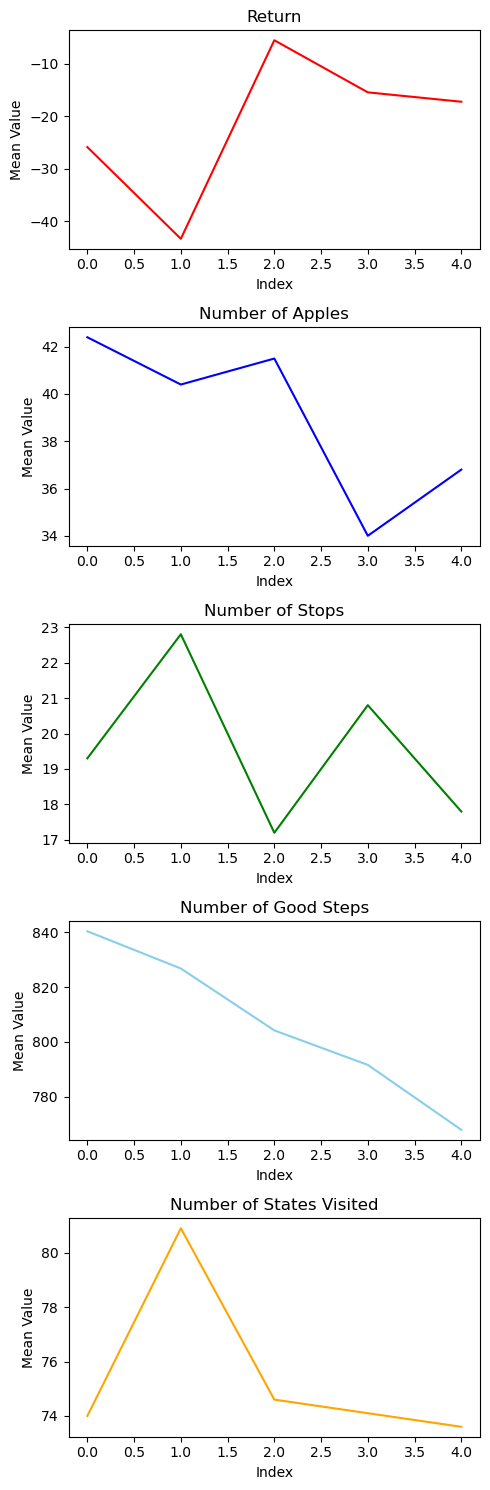

In [48]:
import matplotlib.pyplot as plt
# create subplots for each column
fig, axs = plt.subplots(5, figsize=(5, 15))
axs = axs.flatten()

# plot the mean for each lists
axs[0].plot(re_turn, label='Return',color='red')
axs[1].plot(apple, label='#Apples',color='blue')
axs[2].plot(stop, label='#Stops',color='green')
axs[3].plot(step, label='#GoodSteps',color='skyblue')
axs[4].plot(state, label='#StatesVisited',color='orange')

# give title to each subplot and set labels for x and y axis
axs[0].set_title('Return')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Mean Value')

axs[1].set_title('Number of Apples')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('Mean Value')

axs[2].set_title('Number of Stops')
axs[2].set_xlabel('Index')
axs[2].set_ylabel('Mean Value')

axs[3].set_title('Number of Good Steps')
axs[3].set_xlabel('Index')
axs[3].set_ylabel('Mean Value')

axs[4].set_title('Number of States Visited')
axs[4].set_xlabel('Index')
axs[4].set_ylabel('Mean Value')

# show the plot
plt.tight_layout()
plt.show()